In [109]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import random
from numpy import genfromtxt
import math



In [80]:
data = genfromtxt('day.csv', delimiter=',')
X = data[1:,[2,3,4,5,6,7,8,9,10,11,12]]
print(X.shape)
y = data[1:,15]
print(y.shape)



(731, 11)
(731,)


In [81]:

idx = random.sample(range(X.shape[0]), math.floor(X.shape[0]*0.2))
test_x = X[idx,:]
print("test_x: ", test_x.shape)
train_x = np.delete(X, idx, axis = 0)
print("train_x: ", train_x.shape)

test_y = y[idx]
print("test_y: ", test_y.shape)
train_y = np.delete(y, idx)
print("train_y: ", train_y.shape)


test_x:  (146, 11)
train_x:  (585, 11)
test_y:  (146,)
train_y:  (585,)


1 0.01
0.0157932437983


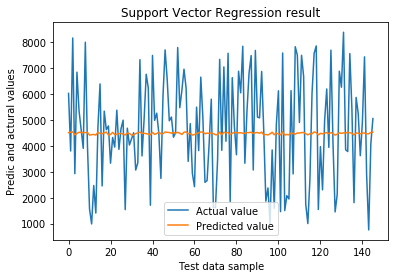

1 0.1
0.0157932437983


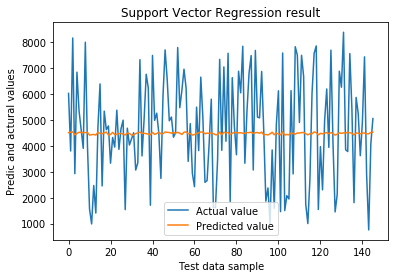

1 1
0.0157632835447


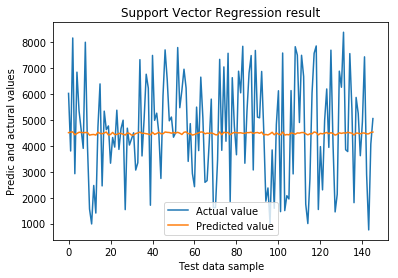

1 10
0.0151666888262


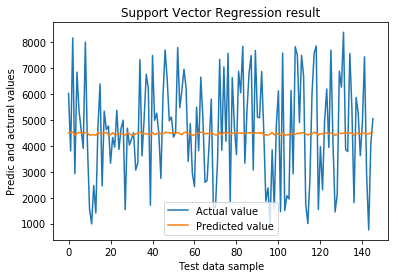

1 100
0.0149826334206


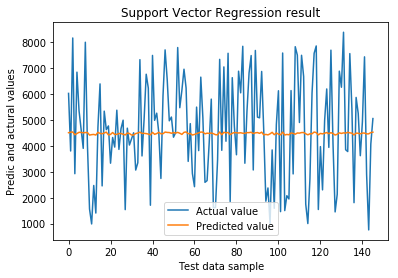

1 1000
0.0117689656944


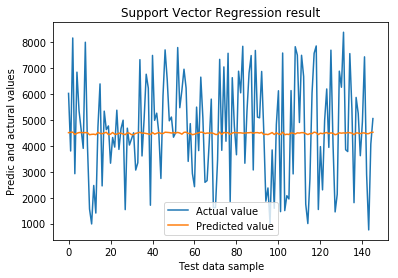

10 0.01
0.156639105524


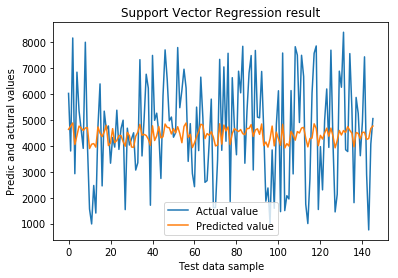

10 0.1
0.156628761728


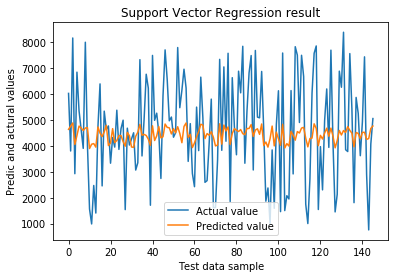

10 1
0.156525099472


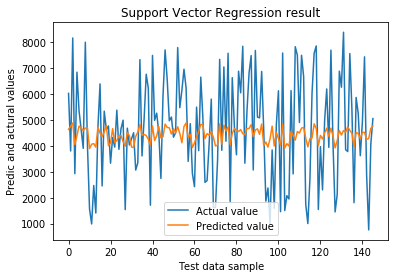

10 10
0.155466047006


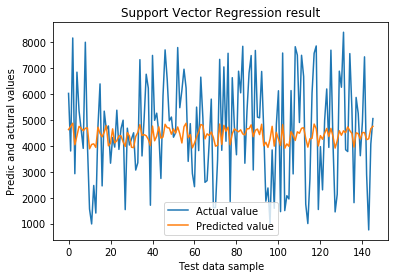

10 100
0.157406332819


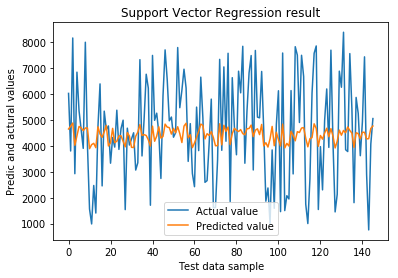

10 1000
0.151481594864


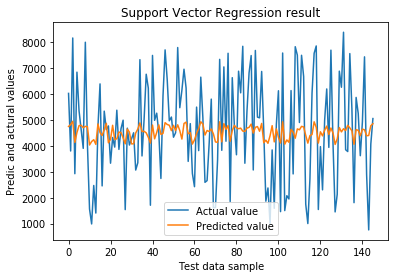

100 0.01
0.577751852248


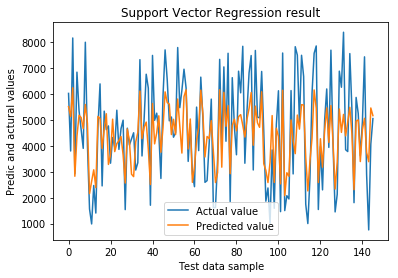

100 0.1
0.577740301396


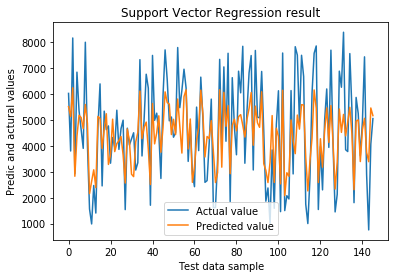

100 1
0.577624577054


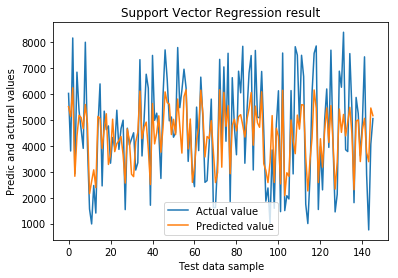

100 10
0.576224668775


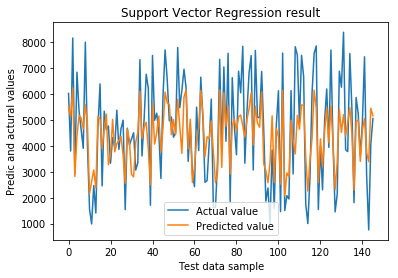

100 100
0.576934889718


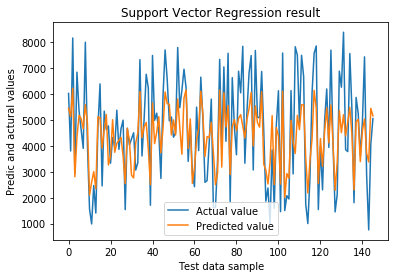

100 1000
0.52921088598


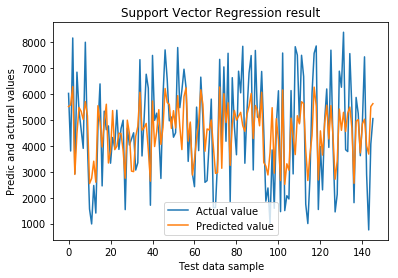

1000 0.01
0.846946075753


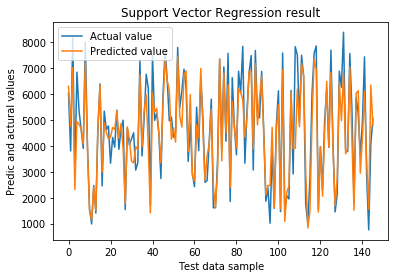

1000 0.1
0.846956243781


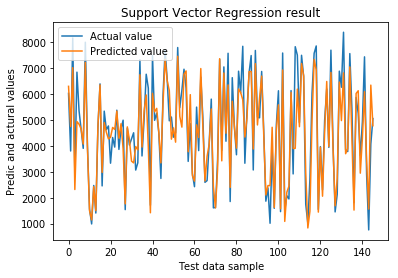

1000 1
0.847057624011


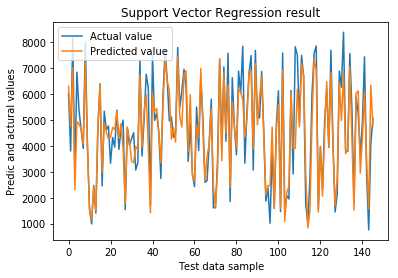

1000 10
0.848158964925


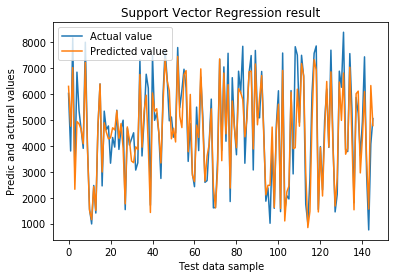

1000 100
0.848580787749


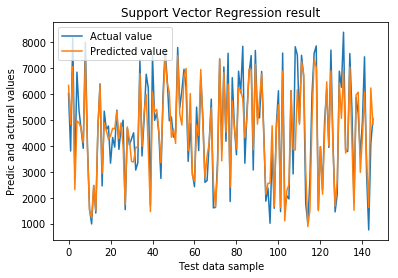

1000 1000
0.785635349921


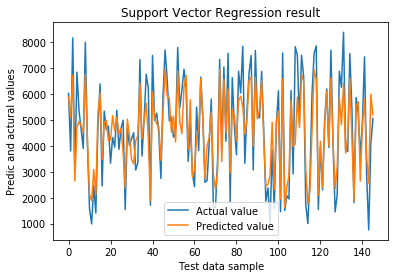

5000 0.01
0.877515922688


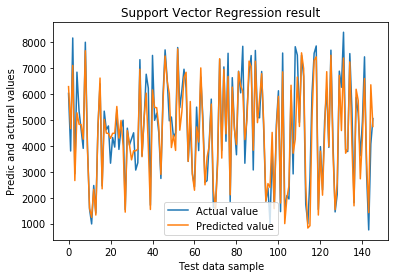

5000 0.1
0.877516039932


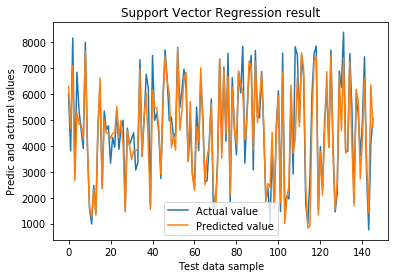

5000 1
0.877516865709


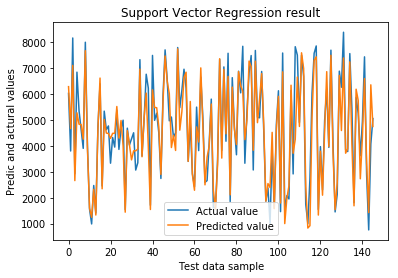

5000 10
0.877655937858


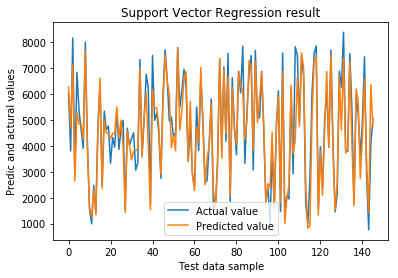

5000 100
0.876166508465


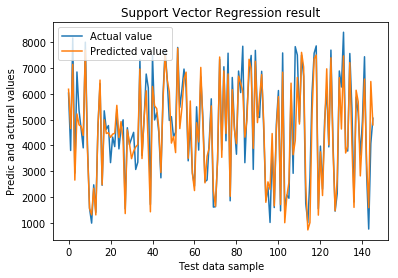

5000 1000
0.829695510863


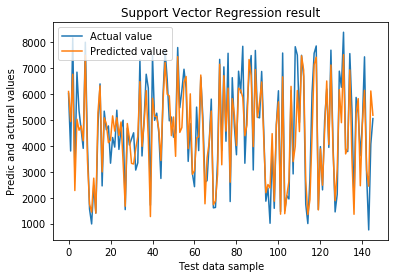

10000 0.01
0.882132530733


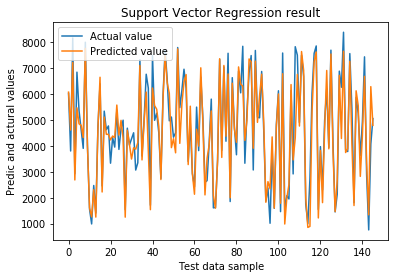

10000 0.1
0.882136569641


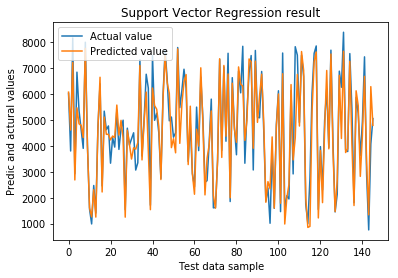

10000 1
0.882181517581


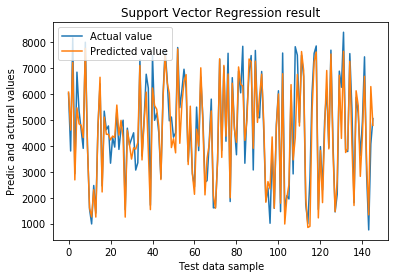

10000 10
0.882526507659


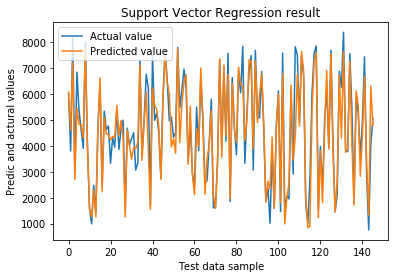

10000 100
0.881060761027


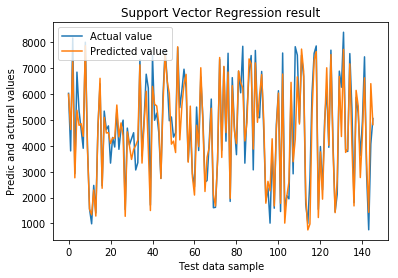

10000 1000
0.828806939951


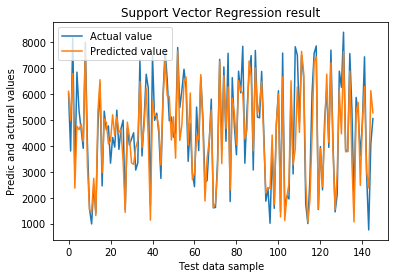

In [108]:
c_list = [100,1000, 5000, 10000]
eps_list = [0.01, 0.1, 1, 10, 100, 1000]

for c in c_list:
    for eps in eps_list:
        print(c, eps)
        svr_rbf = SVR(kernel='rbf', C=c, epsilon = eps, gamma = 0.1)
        model = svr_rbf.fit(train_x, train_y)
        score_rbf = model.score(test_x,test_y)
        print(score_rbf)
        y_rbf = model.predict(test_x)
        plt.plot(test_y,label='Actual value')
        plt.plot(y_rbf,label='Predicted value')
        plt.xlabel('Test data sample')
        plt.ylabel('Predicted and actural values')
        plt.title('Support Vector Regression result')
        plt.legend()
        plt.show()


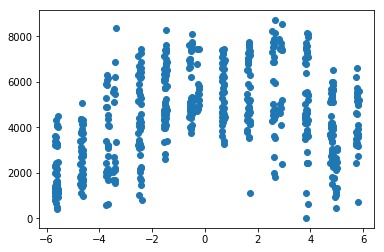

In [104]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=1).fit_transform(train_x)
# print(pca_data)
plt.scatter(pca_data, train_y)
plt.show()